<a href="https://colab.research.google.com/github/sahanabalappa/MachineLearning_Task1/blob/master/weatherdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

In [3]:
df=pd.read_csv('/content/sample_data/weatherdata.ipynb/weatherdata.csv')

# New Section

In [91]:
df

,Location,Address,Resolved Address,Wind Direction,Temperature,Maximum Temperature,Latitude,Wind Speed,Cloud Cover,Heat Index,Chance Precipitation (%),Minimum Temperature,Date time,Precipitation,Sea Level Pressure,Snow Depth,Snow,Name,Relative Humidity,ID,Wind Gust,Conditions,Wind Chill,Longitude
0,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,24.0,76.7,82.5,12.9664,6.2,99.8,84.8,100.0,72.2,09/03/2020,0.1,1006.5,0,0,"Bengaluru, KA, IN",74.0,NaN,12.5,"Rain, Overcast",NaN,77.5872
1,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,42.6,76.3,83.2,12.9664,3.9,87.2,85.3,100.0,70.1,09/04/2020,0.3,1006.9,0,0,"Bengaluru, KA, IN",75.1,NaN,14.5,"Rain, Overcast",NaN,77.5872
2,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,27.2,77.5,86.4,12.9664,4.2,38.0,89.1,95.1,70.6,09/05/2020,0.2,1006.2,0,0,"Bengaluru, KA, IN",74.1,NaN,12.8,"Rain, Partially cloudy",NaN,77.5872
3,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,22.6,77.6,84.3,12.9664,4.8,77.0,88.0,100.0,72.1,09/06/2020,0.9,1005.8,0,0,"Bengaluru, KA, IN",74.8,NaN,16.6,"Rain, Overcast",NaN,77.5872
4,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,65.7,75.5,82.3,12.9664,7.9,71.4,85.5,95.2,69.9,09/07/2020,1.1,1006.8,0,0,"Bengaluru, KA, IN",78.8,NaN,22.1,"Rain, Partially cloudy",NaN,77.5872
5,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,68.9,76.1,84.3,12.9664,7.2,74.3,87.0,80.9,69.3,09/08/2020,0.5,1007.6,0,0,"Bengaluru, KA, IN",77.3,NaN,15.9,"Rain, Partially cloudy",NaN,77.5872
6,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,69.9,75.0,82.3,12.9664,10.7,86.6,85.5,85.7,69.7,09/09/2020,0.4,1006.8,0,0,"Bengaluru, KA, IN",79.6,NaN,21.3,"Rain, Overcast",NaN,77.5872
7,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,66.0,74.1,81.2,12.9664,12.0,96.9,84.0,66.6,69.0,09/10/2020,0.7,1004.9,0,0,"Bengaluru, KA, IN",80.6,NaN,23.7,"Rain, Overcast",NaN,77.5872
8,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,77.2,70.7,74.4,12.9664,11.6,100.0,NaN,66.6,69.0,09/11/2020,0.7,1006.1,0,0,"Bengaluru, KA, IN",87.7,NaN,24.6,"Rain, Overcast",NaN,77.5872
9,"Bengaluru, KA, IN","Bengaluru, KA, IN",NaN,70.4,71.4,78.9,12.9664,12.5,98.9,NaN,76.1,67.7,09/12/2020,0.3,1007.4,0,0,"Bengaluru, KA, IN",83.7,NaN,23.9,"Rain, Overcast",NaN,77.5872


In [4]:
#head()-displays first n rows in the data(by default n=5)
df.drop(["Location", "Address", "Date time","Name","Conditions","Resolved Address","ID","Wind Chill","Heat Index","Snow Depth","Snow"],axis = 1, inplace = True) 
df

,Wind Direction,Temperature,Maximum Temperature,Latitude,Wind Speed,Cloud Cover,Chance Precipitation (%),Minimum Temperature,Precipitation,Sea Level Pressure,Relative Humidity,Wind Gust,Longitude
0,24.0,76.7,82.5,12.9664,6.2,99.8,100.0,72.2,0.1,1006.5,74.0,12.5,77.5872
1,42.6,76.3,83.2,12.9664,3.9,87.2,100.0,70.1,0.3,1006.9,75.1,14.5,77.5872
2,27.2,77.5,86.4,12.9664,4.2,38.0,95.1,70.6,0.2,1006.2,74.1,12.8,77.5872
3,22.6,77.6,84.3,12.9664,4.8,77.0,100.0,72.1,0.9,1005.8,74.8,16.6,77.5872
4,65.7,75.5,82.3,12.9664,7.9,71.4,95.2,69.9,1.1,1006.8,78.8,22.1,77.5872
5,68.9,76.1,84.3,12.9664,7.2,74.3,80.9,69.3,0.5,1007.6,77.3,15.9,77.5872
6,69.9,75.0,82.3,12.9664,10.7,86.6,85.7,69.7,0.4,1006.8,79.6,21.3,77.5872
7,66.0,74.1,81.2,12.9664,12.0,96.9,66.6,69.0,0.7,1004.9,80.6,23.7,77.5872
8,77.2,70.7,74.4,12.9664,11.6,100.0,66.6,69.0,0.7,1006.1,87.7,24.6,77.5872
9,70.4,71.4,78.9,12.9664,12.5,98.9,76.1,67.7,0.3,1007.4,83.7,23.9,77.5872


In [5]:
#shape()-displays total no. of rows and columns in the dataframe
df.shape

(16, 13)

In [6]:
df.columns

Index(['Wind Direction', 'Temperature', 'Maximum Temperature', 'Latitude',
       'Wind Speed', 'Cloud Cover', 'Chance Precipitation (%)',
       'Minimum Temperature', 'Precipitation', 'Sea Level Pressure',
       'Relative Humidity', 'Wind Gust', 'Longitude'],
      dtype='object')

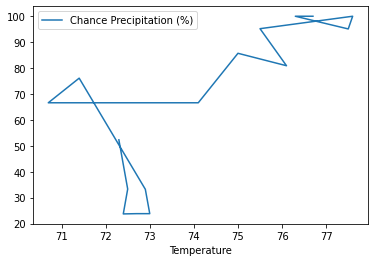

In [95]:
df.plot(y='Chance Precipitation (%)',x='Temperature')

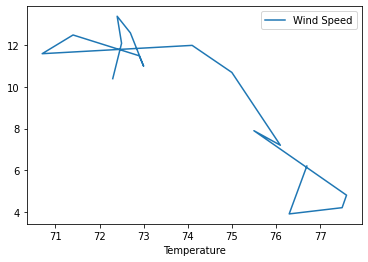

In [96]:
df.plot(y='Wind Speed',x='Temperature')

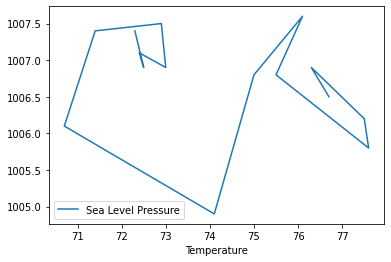

In [97]:
df.plot(y='Sea Level Pressure',x='Temperature')

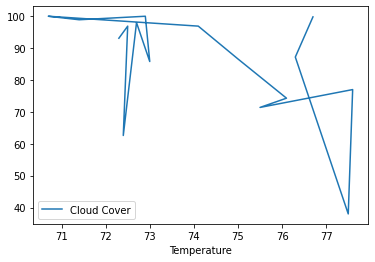

In [98]:
df.plot(y='Cloud Cover',x='Temperature')

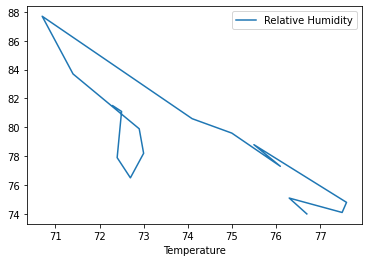

In [99]:
df.plot(y='Relative Humidity',x='Temperature')

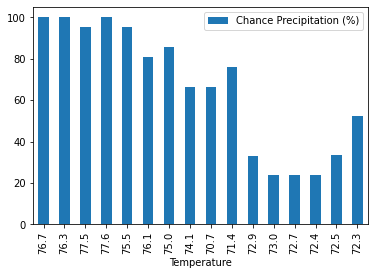

In [94]:
df.plot(kind='bar',y='Chance Precipitation (%)',x='Temperature')

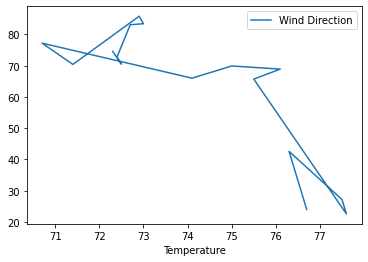

In [100]:
df.plot(y='Wind Direction',x='Temperature')

In [7]:
weather_y=df.pop('Temperature')
weather_x=df

In [8]:
train_x,test_x,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.3,random_state=4)

In [9]:
train_x.head()

,Wind Direction,Maximum Temperature,Latitude,Wind Speed,Cloud Cover,Chance Precipitation (%),Minimum Temperature,Precipitation,Sea Level Pressure,Relative Humidity,Wind Gust,Longitude
9,70.4,78.9,12.9664,12.5,98.9,76.1,67.7,0.3,1007.4,83.7,23.9,77.5872
11,83.4,81.8,12.9664,11.0,85.8,23.8,66.5,0.1,1006.9,78.2,20.6,77.5872
2,27.2,86.4,12.9664,4.2,38.0,95.1,70.6,0.2,1006.2,74.1,12.8,77.5872
15,74.6,79.2,12.9664,10.4,93.1,52.3,66.8,0.4,1007.4,81.5,24.2,77.5872
13,72.8,82.1,12.9664,13.4,62.6,23.7,65.4,0.2,1007.1,77.9,24.6,77.5872


In [10]:
model=LinearRegression ()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
prediction=model.predict(test_x)

In [12]:
pd.DataFrame({'actual':test_y, 
'prediction': prediction,
'diff':(test_y-prediction)})

,actual,prediction,diff
12,72.7,72.578265,0.121735
0,76.7,76.793417,-0.093417
6,75.0,74.647938,0.352062
3,77.6,79.276679,-1.676679
4,75.5,76.468255,-0.968255


In [14]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(test_y,test_y-prediction ), 2))
print("Mean squared error =", round(sm.mean_squared_error(test_y, test_y-prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_y, test_y-prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_y, test_y-prediction), 2))
print("R2 score =", round(sm.r2_score(test_y, test_y-prediction), 2))

# Perform prediction on train data
y_test_pred_new = model.predict(test_x)
print("\nNew mean absolute error =", round(sm.r2_score(test_y, y_test_pred_new), 2))

Linear regressor performance:
Mean absolute error = 75.95
Mean squared error = 5773.87
Median absolute error = 76.47
Explain variance score = -0.8
R2 score = -2069.97

New mean absolute error = 0.72
